In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from resources import *

In [9]:
df = load_data()
X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(df)

In [ ]:
tree = train_one_r(X_train[['Elevation']],y_train)

In [ ]:
knn = train_knn(X_train,y_train)
rf  = train_random_forest(X_train,y_train)

from joblib import dump
models = [knn, rf, tree]
algos = ['knn', 'rf', 'tree']

[dump(models[i], f"{algos[i]}.joblib") for i in range(len(models))]

In [ ]:
# Create a KerasClassifier model
model = KerasClassifier(
    model=create_nn,
    lr=0.001,
    n_layers=2,
    n_neurons=64,
    dropout_rate=0.2,
    epochs=15,
    batch_size=128,
    verbose=0
)

# Define the grid search parameters
params_grid = {
    'lr':[0.001,0.0001,0.01],
    'n_layers':[1,2,3],
    'n_neurons':[32,64,128,512],
    'dropout_rate':[0.1,0.2,0.01],
} # define the grid search parameters here

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params_grid,
    cv=2
)

grid_result = grid_search.fit(X_train[:20000], y_train[:20000])

In [10]:
model_nn = create_nn(**grid_result.best_params_)
early_stop = EarlyStopping(monitor='val_loss', patience=7)
history = model_nn.fit(X_train, y_train -1, epochs=40, batch_size=128, validation_data=(X_valid, y_valid-1), callbacks=[early_stop], verbose=1)
model_nn.save('model_nn.h5')

Epoch 1/40
3677/3677 [==============================] - 27s 7ms/step - loss: 0.6188 - accuracy: 0.7376 - val_loss: 0.5514 - val_accuracy: 0.7632
Epoch 2/40
3677/3677 [==============================] - 25s 7ms/step - loss: 0.5024 - accuracy: 0.7833 - val_loss: 0.4836 - val_accuracy: 0.7888
Epoch 3/40
3677/3677 [==============================] - 24s 7ms/step - loss: 0.4532 - accuracy: 0.8050 - val_loss: 0.5450 - val_accuracy: 0.7667
Epoch 4/40
3677/3677 [==============================] - 25s 7ms/step - loss: 0.4201 - accuracy: 0.8215 - val_loss: 0.4824 - val_accuracy: 0.7912
Epoch 5/40
3677/3677 [==============================] - 25s 7ms/step - loss: 0.3968 - accuracy: 0.8319 - val_loss: 0.3854 - val_accuracy: 0.8350
Epoch 6/40
3677/3677 [==============================] - 26s 7ms/step - loss: 0.3805 - accuracy: 0.8388 - val_loss: 0.4325 - val_accuracy: 0.8158
Epoch 7/40
3677/3677 [==============================] - 25s 7ms/step - loss: 0.3668 - accuracy: 0.8452 - val_loss: 0.5237 - val_ac

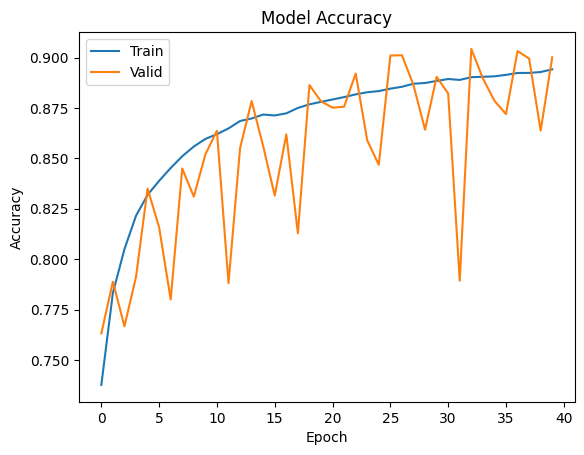

Text(0.5, 1.0, 'Model Loss')

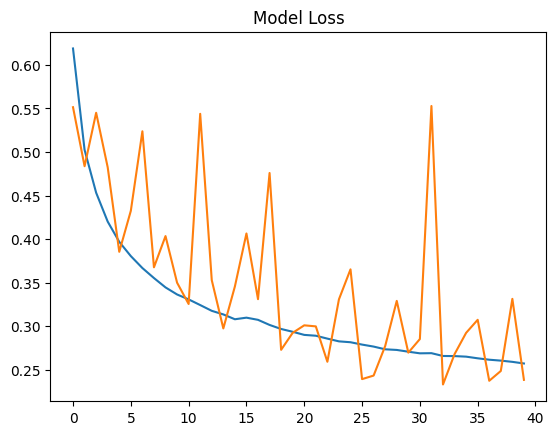

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')

In [12]:
# Evaluate your neural network and other models
# Choose appropriate plots and/or metrics to compare them

# Neural Network
_, y_pred_nn = evaluate_model(model_nn, X_test, y_test, nn=True)
print("Neural Network:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn)}")
print(f"Precision: {precision_score(y_test, y_pred_nn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_nn, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_nn, average='macro')}")

# Random Forest
_, y_pred_rf = evaluate_model(rf, X_test, y_test, nn=False)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='macro')}")

# K-nearest neighbors
_, y_pred_knn = evaluate_model(knn, X_test, y_test, nn=False)
print("K-nearest neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='macro')}")

# OneR
_, y_pred_1r = evaluate_model(tree, X_test[['Elevation']], y_test, nn=False)
print("OneR:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_1r)}")
print(f"Precision: {precision_score(y_test, y_pred_1r, average='macro', zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred_1r, average='macro', zero_division=1)}")
print(f"F1 Score: {f1_score(y_test, y_pred_1r, average='macro', zero_division=1)}")


1816/1816 [==============================] - 3s 1ms/step
Neural Network:
Accuracy: 0.9020687756015283
Precision: 0.8665752423639399
Recall: 0.8565122944059217
F1 Score: 0.8606830171197707
Random Forest:
Accuracy: 0.9583835324085229
Precision: 0.9468299452002394
Recall: 0.9120795879876334
F1 Score: 0.9284431745369766
K-nearest neighbors:
Accuracy: 0.9663178548070634
Precision: 0.9488190484356407
Recall: 0.9210179551907199
F1 Score: 0.9336974188705719
OneR:
Accuracy: 0.6363292141406492
Precision: 0.8960930969262583
Recall: 0.2127089778892464
F1 Score: 0.19603458173388905


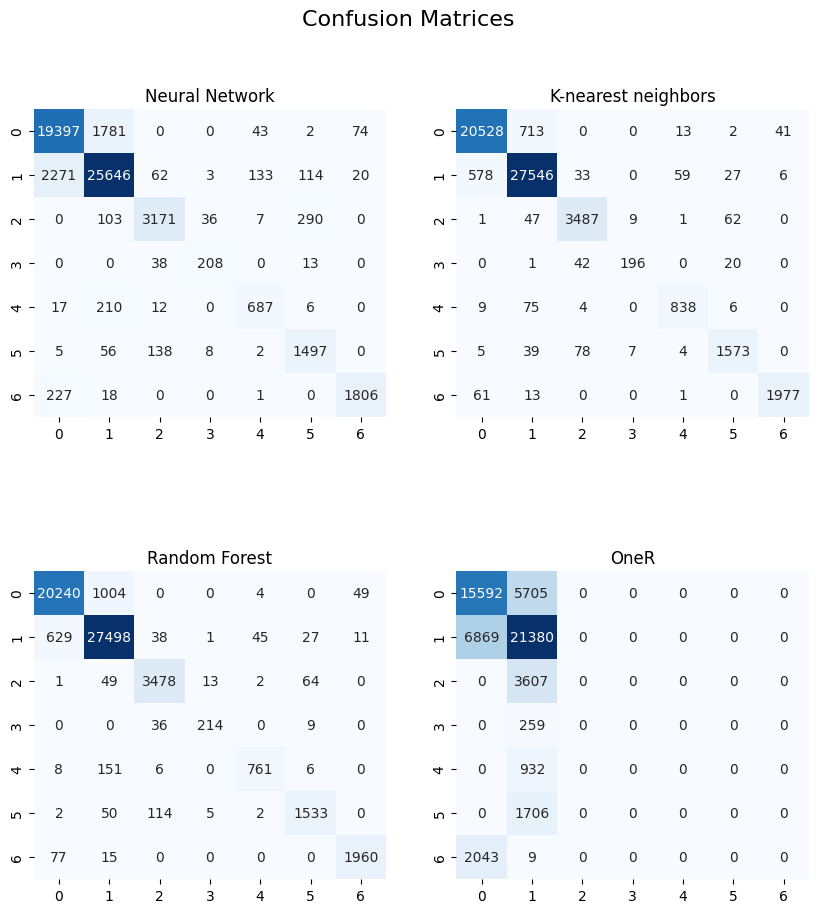

In [15]:
# create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Confusion Matrices', fontsize=16)

# plot the confusion matrix for neural network on first subplot
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='.0f', cmap='Blues', ax=axs[0, 0], cbar=False)
axs[0, 0].set_title('Neural Network')

# plot the confusion matrix for k-nearest neighbors on second subplot
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f', cmap='Blues', ax=axs[0, 1], cbar=False)
axs[0, 1].set_title('K-nearest neighbors')

# plot the confusion matrix for random forest on third subplot
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='.0f', cmap='Blues', ax=axs[1, 0], cbar=False)
axs[1, 0].set_title('Random Forest')

# plot the confusion matrix for OneR on fourth subplot
sns.heatmap(confusion_matrix(y_test, y_pred_1r), annot=True, fmt='.0f', cmap='Blues', ax=axs[1, 1], cbar=False)
axs[1, 1].set_title('OneR')

# adjust the spacing between subplots and show the figure
plt.subplots_adjust(hspace=0.5)
plt.show()